In [20]:
import pandas as pd
import numpy as np
from sklearn import naive_bayes
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/spam.csv",encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis= 1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [9]:
df['text']= df['v2']
df['target'] = df['v1']
df

,v1,v2,text,target
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",ham
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",ham
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,spam
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì_ b going to esplanade fr home?,ham
5569,ham,"Pity, * was in mood for that. So...any other s...","Pity, * was in mood for that. So...any other s...",ham
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like i'd...,ham


In [10]:
df.drop(['v1','v2'],axis = 1,inplace=True)
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [11]:
df['target_label'] = df['target'].map({'ham':0,'spam':1})
df

,text,target,target_label
0,"Go until jurong point, crazy.. Available only ...",ham,0
1,Ok lar... Joking wif u oni...,ham,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1
3,U dun say so early hor... U c already then say...,ham,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam,1
5568,Will Ì_ b going to esplanade fr home?,ham,0
5569,"Pity, * was in mood for that. So...any other s...",ham,0
5570,The guy did some bitching but I acted like i'd...,ham,0


In [13]:
vector = TfidfVectorizer(decode_error='ignore')
x = vector.fit_transform(df['text'])
x

<5572x8672 sparse matrix of type '<class 'numpy.float64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,df['target_label'],test_size=0.2)

In [17]:
model = naive_bayes.MultinomialNB()

In [18]:
model.fit(x_train,y_train)


MultinomialNB()

In [19]:
model.score(x_test,y_test)

0.968609865470852

In [21]:
def visual(label):
    words = ''
    for msg in df[df['target']==label]['text']:
        msg = msg.lower()
        words +=msg+''
    wordscloud = WordCloud(width =600,height= 500).generate(words)
    plt.imshow(wordscloud)
    plt.axis("off")
    plt.show()

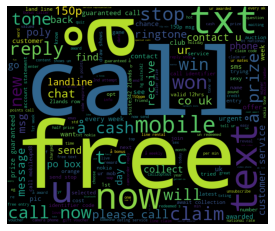

In [22]:
visual("spam")

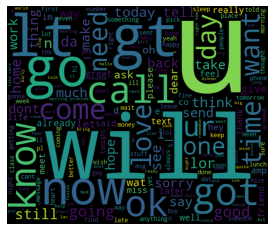

In [23]:
visual("ham")